In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv',header=0)
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
X=df.drop('label',axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [4]:
y=df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [5]:
df.shape

(20800, 5)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
df=df.dropna()

In [8]:
messages=df.copy()
messages.reset_index(inplace=True)

In [9]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps=PorterStemmer()
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['text'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [10]:
corpus[3]

'video civilian kill singl us airstrik identifi rate civilian kill american airstrik afghanistan higher us engag activ combat oper photo hellfir missil load onto us militari reaper drone afghanistan staff sgt brian ferguson u air forc bureau abl identifi civilian kill singl us drone strike afghanistan last month biggest loss civilian life one strike sinc attack medecin san frontier hospit msf last octob us claim conduct counter terror strike islam state fighter hit nangarhar provinc missil septemb next day unit nation issu unusu rapid strong statement say strike kill civilian injur other gather hous celebr tribal elder return pilgrimag mecca bureau spoke man name haji rai said owner hous target said peopl kill other injur provid name list bureau abl independ verifi ident die rai son headmast local school among anoth man abdul hakim lost three son attack rai said involv deni us claim member visit hous strike said even speak sort peopl phone let alon receiv hous death amount biggest conf

In [11]:
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [12]:
X.shape

(18285, 5000)

In [13]:
y=messages['label']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [15]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [17]:
count_df=pd.DataFrame(X_train,columns=tfidf_v.get_feature_names())
count_df.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
import matplotlib.pyplot as plt

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf=PassiveAggressiveClassifier()

In [25]:
from sklearn import metrics
import numpy as np
import itertools

accuracy: 0.950
Confusion matrix, without normalization


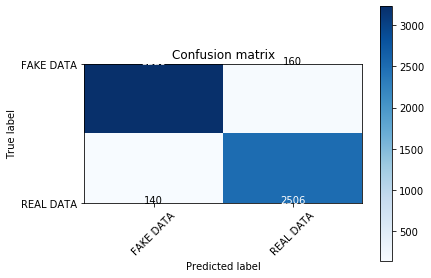

In [30]:
linear_clf.fit(X_train,y_train)
pred=linear_clf.predict(X_test)
score=metrics.accuracy_score(y_test,pred)
print("accuracy: %0.3f"%score)
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['FAKE DATA','REAL DATA'])